# Dataset Preparation


### Setup

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

seed = 1855

## Data Collection


In [10]:
path = "./regression-problems/graduate-admissions/dataset/admission-predict.csv"

df = pd.read_csv(path)

# converting column names to snake case and removing Serial No. as it is not needed
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

df.drop("serial_no.", axis=1, inplace=True)
df.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Handling missing values


In [11]:
# checking for missing values

df.isnull().sum()

gre_score            0
toefl_score          0
university_rating    0
sop                  0
lor                  0
cgpa                 0
research             0
chance_of_admit      0
dtype: int64

## Encoding categorical features with One-Hot Encoding


## Encoding binary class label


# Model Building


In [12]:
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.neighbors import *
from sklearn.linear_model import *
from sklearn.svm import *

## Splitting the dataset into training and testing sets


In [26]:
x = df.drop("chance_of_admit", axis=1)
y = df["chance_of_admit"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

x_train

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research
83,322,115,5,4.0,4.5,9.36,1
139,318,109,1,3.5,3.5,9.12,0
21,325,114,4,3.0,2.0,8.40,0
296,310,107,3,3.5,3.5,8.67,0
286,336,118,5,4.5,4.0,9.19,1
...,...,...,...,...,...,...,...
72,321,111,5,5.0,5.0,9.45,1
149,311,106,2,3.5,3.0,8.26,1
91,299,97,3,5.0,3.5,7.66,0
64,325,111,3,3.0,3.5,8.70,0


## Evaluation function


In [16]:
def evalute(expected, predicted):
    print("Mean Absolute Error: ", mean_absolute_error(expected, predicted))
    print("Mean Squared Error: ", mean_squared_error(expected, predicted))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(expected, predicted)))
    print("R2 Score: ", r2_score(expected, predicted))

## Model Building


In [17]:
model = RandomForestRegressor(random_state=seed)

## Model Evaluation


### Cross Validation

In [18]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
k_fold = 10
cross_validation_results = cross_validate(model, x_train, y_train, cv=k_fold, scoring=scoring)

for metric, scores in cross_validation_results.items():
  if 'time' not in metric:
    name  = metric.replace('test_','' ).replace("_", ' ').replace('neg ', '').capitalize()
    print(f'{name}: {-np.mean(scores):.2f} += {np.std(scores):.2f}')
  
# relative_error = rmse/mean
relative_error = -cross_validation_results['test_neg_root_mean_squared_error'] / y_train.mean()
print(f"Relative error: {relative_error.mean():.3f}")

Mean absolute error: 0.05 += 0.01
Mean squared error: 0.01 += 0.00
Root mean squared error: 0.07 += 0.01
Relative error: 0.104


### Cross Validation with KFold

In [19]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
cross_validation_results = cross_validate(model, x_train, y_train, cv=k_fold, scoring=scoring)

for metric, scores in cross_validation_results.items():
  if 'time' not in metric:
    name  = metric.replace('test_','' ).replace("_", ' ').replace('neg ', '').capitalize()
    print(f'{name}: {-np.mean(scores):.2f} += {np.std(scores):.2f}')
  
# relative_error = rmse/mean
relative_error = -cross_validation_results['test_neg_root_mean_squared_error'] / y_train.mean()
print(f"Relative error: {relative_error.mean():.3f}")

Mean absolute error: 0.05 += 0.01
Mean squared error: 0.01 += 0.00
Root mean squared error: 0.07 += 0.02
Relative error: 0.102


### Cross Validation with StratifiedKFold

In [ ]:
# Stratified KFold does not work when the target is continuous

## Model Building with Hyperparameter Tuning


In [21]:
model = RandomForestRegressor(random_state=seed)
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10,  20],
}

grid_search = GridSearchCV(model, param_grid=params, cv=k_fold, scoring='neg_root_mean_squared_error')

grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 5, 'n_estimators': 200}



## Model Evaluation


Mean Absolute Error:  0.03949052684194655
Mean Squared Error:  0.003193652899376864
Root Mean Squared Error:  0.056512413675022445
R2 Score:  0.8163576197641513


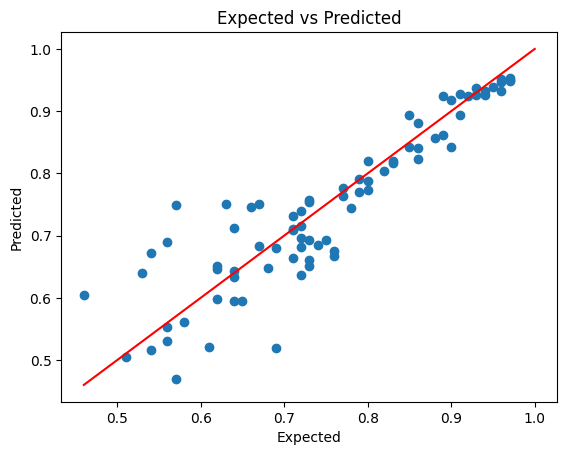

In [30]:
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

evalute(y_test, y_pred)


# plot the expected vs predicted values

plt.scatter(y_test, y_pred)
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.title("Expected vs Predicted")
x = np.linspace(y_test.min(), 1, 100)
y = x
plt.plot(x, y, '-r')

plt.show()

# Comparing Different Models Performance

## Model Building

In [24]:
models = {
    "Random Forest": RandomForestRegressor(random_state=seed),
    "Decision Tree": DecisionTreeRegressor(random_state=seed),
    "KNN": KNeighborsRegressor(),
    "Linear Regression": LinearRegression(),
    "SVM": SVR(),
}

## Model Comparison

In [25]:

results = {}
for name, model in models.items():
  results[name] = -cross_val_score(model, x_train, y_train, cv=k_fold, scoring='neg_mean_absolute_error')
  
results = pd.DataFrame(results).transpose()

results['mean'] = results.mean(axis=1)
results['std'] = results.std(axis=1)
results['relative_error'] = results.mean(axis=1) / y_train.mean()

results = results.sort_values('mean', ascending=True)

results

,0,1,2,3,4,5,6,7,8,9,mean,std,relative_error
Linear Regression,0.065329,0.056888,0.035837,0.059272,0.033323,0.052533,0.046851,0.047245,0.042454,0.049175,0.048891,0.009573,0.063588
Random Forest,0.072994,0.063988,0.034094,0.067716,0.033147,0.056197,0.059294,0.054572,0.053550,0.047253,0.054280,0.012481,0.070813
KNN,0.077500,0.064125,0.050438,0.067375,0.055250,0.070875,0.064250,0.066562,0.049750,0.057062,0.062319,0.008550,0.080628
Decision Tree,0.071563,0.080000,0.039688,0.082500,0.049062,0.065000,0.083438,0.076563,0.068437,0.075000,0.069125,0.013727,0.089927
SVM,0.086092,0.075576,0.069023,0.078784,0.058921,0.074930,0.060559,0.074128,0.060633,0.063928,0.070257,0.008633,0.090782
